**`odds`**, **`logit`** function and **`sigmoid`** function.
- `oods`: Tỷ lệ sự kiện xảy ra (thành công) / tỷ lệ không xảy ra (thất bại)  
      -> `odds = P/(1-P)`
- `logit`: = `ln(odds)` -> chuyển biến trong khoảng `(0, 1)` thành giá trị mới ở khoảng `(-∞, +∞)`  
      -> `L = ln(p/(1-p))`  => từ xác xuất P chuyển sang số thực L
- `sigmoid`- `logistic function` : -> chuyển z bất kì thuộc `(-∞, +∞)` về `(0, 1)`  
      -> `P = 1/(1+e^(-L))` => Chuyển từ số thực L về xác xuất P của nó.

Text(0, 0.5, 'P')

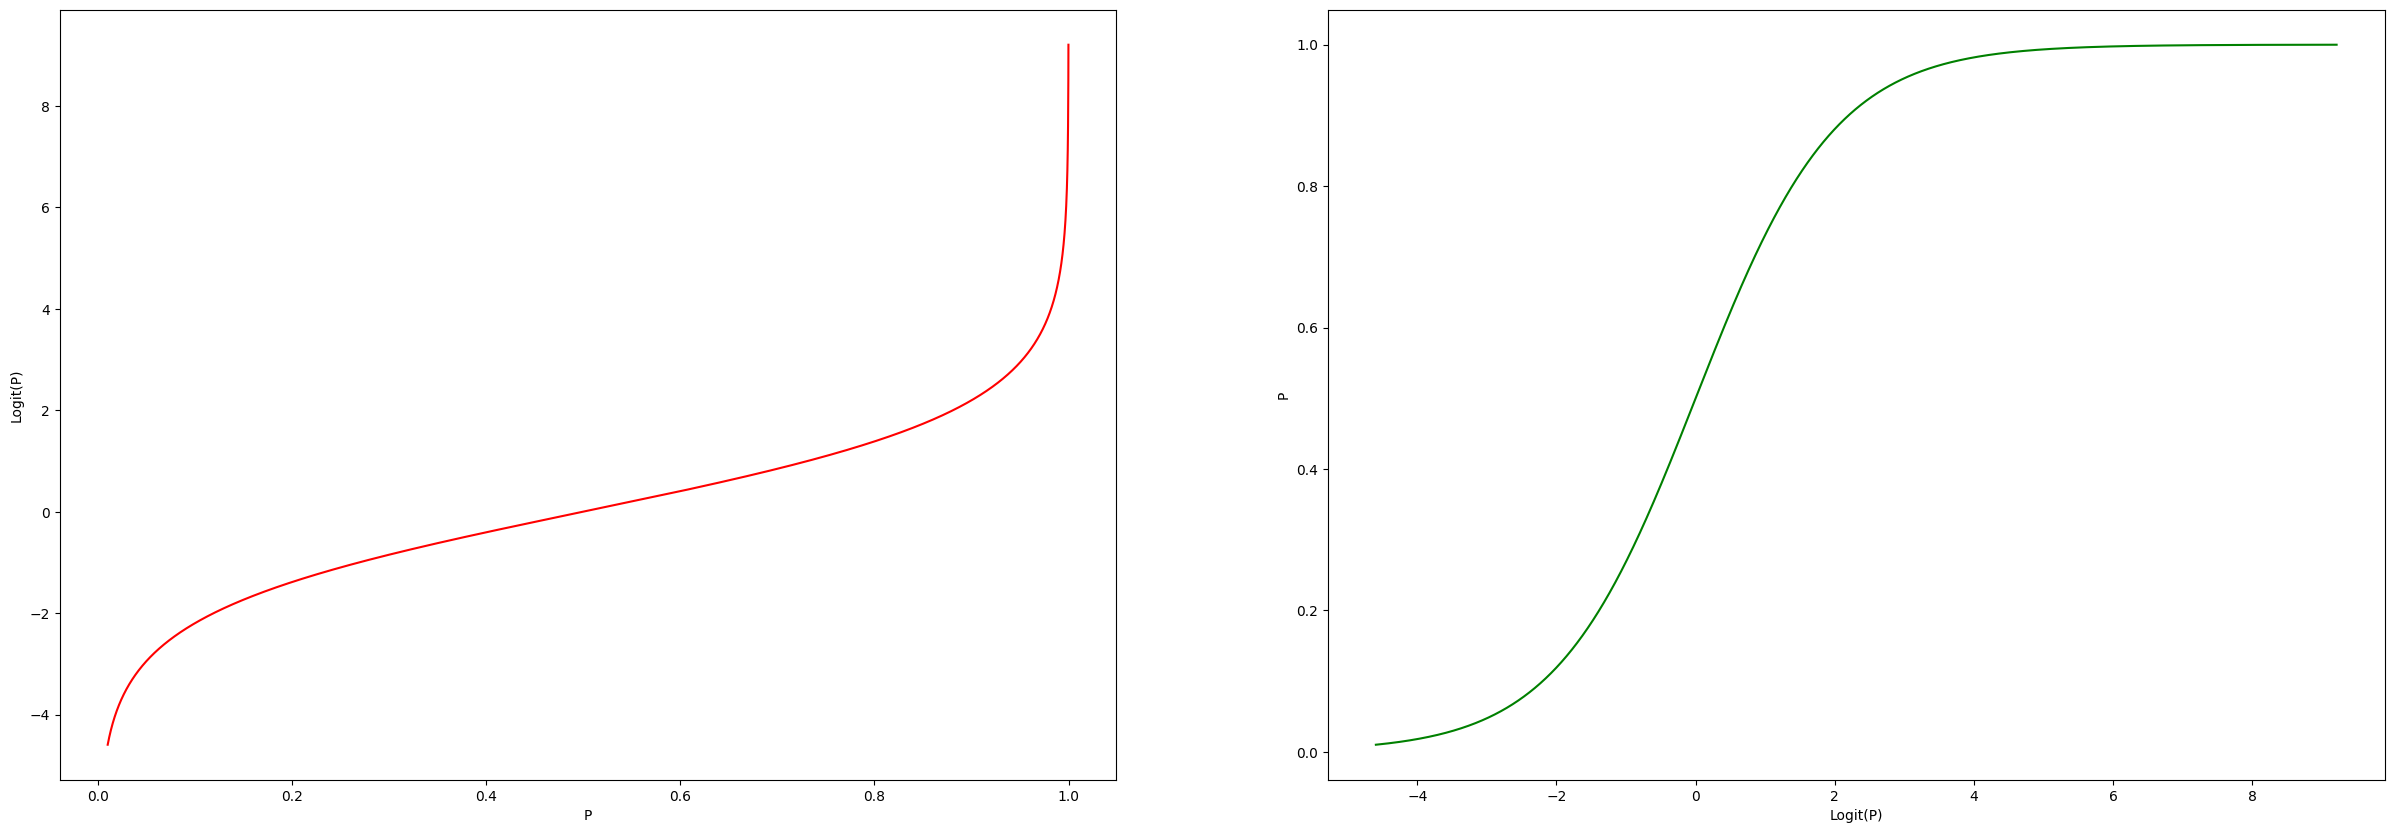

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0.01, 1, 0.0001)

logit = lambda x: np.log(x/(1-x)) # or math.log
L = [logit(x) for x in X]

sigmoid = lambda x: 1/(1+np.exp(-x)) # or math.exp
P = [sigmoid(l) for l in L]

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
ax.plot(X, L, label='logit(x)', c='r')
ax.set_xlabel('P')
ax.set_ylabel('Logit(P)')

ax = fig.add_subplot(122)
ax.plot(L, P, label='sigmoid(x)', c='g')
ax.set_xlabel('Logit(P)')
ax.set_ylabel('P')

# Công thức tổng quát trong `Logistic Regression`
- `sigmoid` using `intercept` and `coef`:
      `P(Y=1|X) = 1/(1+e^(-z))`  
  where,
      `z = B0 + B1x1 + B2x2 + ... + Bnxn`
    - note:  
      - B0 = `intercept`
      - B1, B2, .. Bn = `coef[1, 2,. .. , n]`

# **Training `sklean.linear_model.LogisticRegression` model**

**load & plotting data** -> `load_breast_cancer` built-in dataset

In [2]:
from sklearn.datasets import load_breast_cancer # ung thu vu

# load dataset
cancer = load_breast_cancer()
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

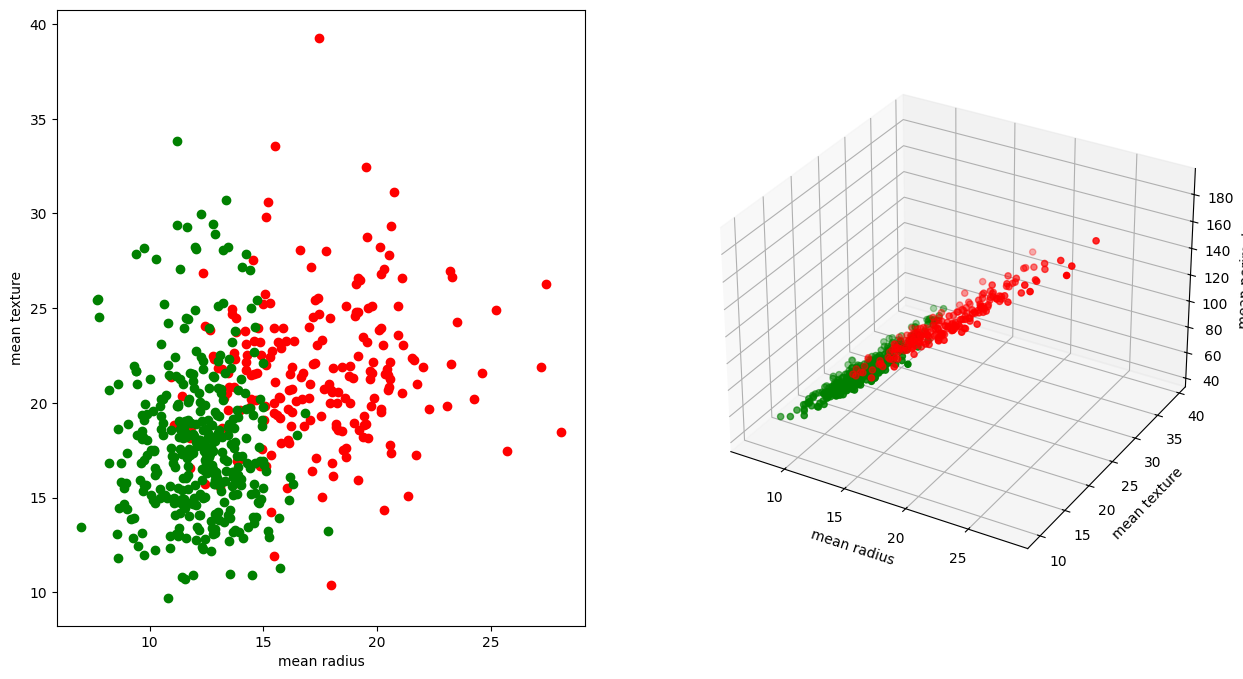

In [3]:
# plotting

X = []
for target in range(2):# X = [target=0, target=1]
    X.append([[], [], []])  # [[radius], [texture], [perimeter]]
    for i in range(len(cancer.data)): # target is 0 or 1
        if cancer.target[i] == target:
            X[target][0].append(cancer.data[i][0]) # mean radius 
            X[target][1].append(cancer.data[i][1]) # mean texture
            X[target][2].append(cancer.data[i][2]) # mean perimeter

# x đang lưu  2 mảng con:
# - 1 mảng con ứng với target = 0
# - 1 mảng con ứng với target = 1
# mỗi mảng con đó lại lưu 3 mảng con là 
# mảng giá trị cột mean_radius, mảng giá trị cột mean_texture và cột mean_perimeter
# ứng với target tương ứng

fig = plt.figure(figsize=(15, 8))
colors = ['r', 'g'] # ac tinh, lanh tinh

ax2D = fig.add_subplot(121)
ax2D.set_xlabel('mean radius')
ax2D.set_ylabel('mean texture')
for target in range(2):
    ax2D.scatter(X[target][0], X[target][1], c=colors[target])

ax3D = fig.add_subplot(122, projection='3d')
ax3D.set_xlabel('mean radius')
ax3D.set_ylabel('mean texture')
ax3D.set_zlabel('mean perimeter')
for t in range(2):
    ax3D.scatter(X[t][0], X[t][1], X[t][2], c=colors[t])

## **Training using all feature**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

print(cancer.data[:2, :])

train_set, test_set, train_labels, test_labels = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=1, stratify=cancer.target)
# stratify=cancer.target -> split dựa trên tỷ lệ phân bố của từng label trong target

model = LogisticRegression(max_iter=3000) # max_iter: so lan lap toi da se chay
                                           # khong can khai bao cung duoc -> LogisticRegression()
X = train_set[:, 0:30]
y = train_labels

model.fit(X=X, y=y)

# score
print(f'score: {model.score(test_set, test_labels)}')

# coef, intercept
coef = model.coef_[0]
intercept = model.intercept_[0]
print(coef)
print(intercept)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
score: 0.9532163742690059
[ 0.65963497  0.29219478 -0.39672787  0.03585358 -0.07360968 -0.13150099
 -0.36089353 -0.17312744 -0.22836185 -0.01037131 -0.09837962  0.75525367
  0.35931833 -0.14488752 -0.00523275  0.02290619 -0.04615627 -0.02667409
 -0.03294203  0.00190764  0.24223076 -0.49559411 -0.11251494 -0.01458458
 -0.17873627 -0.60588478 -1.1577139  -0.43646464 -0.6584037

### **`predict()`** vs **`predict_proba()`**
- `predict` : trả về nhãn dự đoán
- `predict_proba` : trả về xác xuất từng lớp.

In [42]:
import pandas as pd

y_pred_labels = model.predict(test_set)
y_pred_proba = model.predict_proba(test_set)

predict = pd.DataFrame(y_pred_proba, columns=['% actinh', '% lanhtinh'])
predict['ketluan'] = y_pred_labels
predict['original'] = test_labels

predict[predict.ketluan != predict.original]

,% actinh,% lanhtinh,ketluan,original
62,0.249372,0.750628,1,0
74,0.912123,0.087877,0,1
99,0.137839,0.862161,1,0
105,0.788724,0.211276,0,1
123,0.315370,0.684630,1,0
130,0.177330,0.822670,1,0
132,0.790555,0.209445,0,1
151,0.082808,0.917192,1,0


### **`sklearn.metrics`** -> Confusion maxtrix and other metrics
```
-----------
| TN | FP |
|----|----|
| FN | TP |
-----------
```
- `TP` - True Positive : đoán đúng, dự đoán 1 
- `FP` - False Positive : đoán sai, dự đoán 1, thực tế 0
- `TN` - True Negative : đoán đúng, dự đoán 0
- `FN` - False Negative : đoán sai, dự đoán 0, thực tế 1

In [48]:
from sklearn import metrics
print(metrics.confusion_matrix(y_true=test_labels, y_pred=y_pred_labels))
# => doan dung: 59 + 104 = 163
# => doan sai: 3+5 = 8

[[ 59   5]
 [  3 104]]


In [49]:
# accuracy
# (TP+FN)/(TN+FP+TP+FN)
print(model.score(test_set, test_labels))

0.9532163742690059

In [51]:
# other metrics
print(metrics.classification_report(y_true=test_labels, y_pred=y_pred_labels))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



- `accuracy` (model.score) = (TN+TP)/(TN+TP+FN+FP) : tỷ lệ đoán đúng
- `precision` : TP/(TP+FP) : tỷ lệ đoán đúng khi nhãn dự đoán = 1
- `recall` hay `tpr`: TP/(TP+FN) : tỷ lệ đoán đúng nhãn 1 / tổng số nhãn thực sự là 1
- `f1-score`: 2*recall*precision/(precision+recall)
- `fpr` - false positive rate: = FP/(FP+TN) tỷ lệ đoán sai nhãn 1 /tổng số nhãn thực sự là 0

`roc_curve` -> xem sự thay đổi của fpr và tpr khi ngưỡng dự đoán (`threshold`) thay đổi  
`threshold`: ngưỡng dự đoán:
- ex: threshold=0.3 -> [0.3, 1] -> 1 / [0, 0.3) -> 0

`auc` : khả năng phân loại của model.
- `auc = 1` -> mô hình hoàn hảo
- `auc = 0.5` -> mô hình hiệu quả ngang random
- `0.5<auc<1` -> mô hình tốt hơn random
- `auc<0.5` -> mô hình dự đoán ngược

(`auc` là phần diện tích bên dưới đường `roc`, vì vậy `auc` càng cao -> `tpr` cao trong khi `fpr` thấp (đường `roc` tiến gần góc trên trái) -> mô hình phân loại càng chính xác)

In [69]:
# y_pred_proba gồm n hàng, mỗi hàng gồm 2 giá trị: xác xuất là lớp 0 / xác xuất là lớp 1
fp_prob = y_pred_proba[:, 1] #
# roc
fpr, tpr, threshold = metrics.roc_curve(test_labels, fp_prob)
print(threshold)
print(tpr)
print(fpr)
# auc
auc = metrics.auc(fpr, tpr)
print(auc)

[           inf 9.99999859e-01 9.19570951e-01 9.17192469e-01
 8.93566704e-01 8.62161199e-01 8.61709962e-01 8.22670484e-01
 7.52394008e-01 7.50627635e-01 6.93190291e-01 6.84630087e-01
 5.80896456e-01 2.55001177e-01 2.09445266e-01 1.91672447e-01
 8.78770737e-02 4.87575628e-16]
[0.         0.00934579 0.89719626 0.89719626 0.90654206 0.90654206
 0.91588785 0.91588785 0.94392523 0.94392523 0.95327103 0.95327103
 0.97196262 0.97196262 0.99065421 0.99065421 1.         1.        ]
[0.       0.       0.       0.015625 0.015625 0.03125  0.03125  0.046875
 0.046875 0.0625   0.0625   0.078125 0.078125 0.125    0.125    0.140625
 0.140625 1.      ]
0.9925525700934579


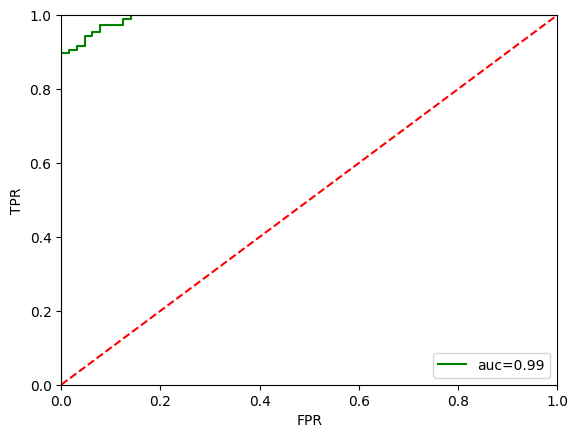

In [71]:
# ploting
plt.plot(fpr, tpr, 'g', label=f'auc={round(auc, 2)}')
plt.plot([0, 1], [0, 1], 'r--')
plt.axis([0, 1, 0, 1])
# auc 
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()